# Demo Notebook for computing Subspace Robust Wasserstein Distances

In this demo notebook, we will compute the Subspace Robust Wasserstein Distance between two toy discrete measures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from SRW import SubspaceRobustWasserstein
from Optimization.projectedascent import ProjectedGradientAscent
from Optimization.frankwolfe import FrankWolfe

GPU not found.


## Data

We will consider two empirical measures with $n$ points each in dimension $d$. These points are i.i.d. drawn from two Gaussian distributions $\mathcal{N}(0, \Sigma_1)$ and $\mathcal{N}(0, \Sigma_2)$, where $\Sigma_1$ and $\Sigma_2$ are drawn from a Wishart distribution with $k$ degrees of freedom.

In [3]:
d = 10 # Dimension of the Gaussians
n = 30 # Number of points for the empirical distributions
k = 2  # Order of the Wishart distribution, i.e. dimension of the support of the Gaussians

In [4]:
# Equal weights
a = (1./n) * np.ones(n)
b = (1./n) * np.ones(n)

# Zero means
mean_1 = np.zeros(d)
mean_2 = np.zeros(d)

# Covariances from Wishart
cov_1 = np.random.randn(d,k)
cov_1 = cov_1.dot(cov_1.T)
cov_2 = np.random.randn(d,k)
cov_2 = cov_2.dot(cov_2.T)

# Empirical measures with n points
X = np.random.multivariate_normal(mean_1, cov_1, size=n)
Y = np.random.multivariate_normal(mean_2, cov_2, size=n)

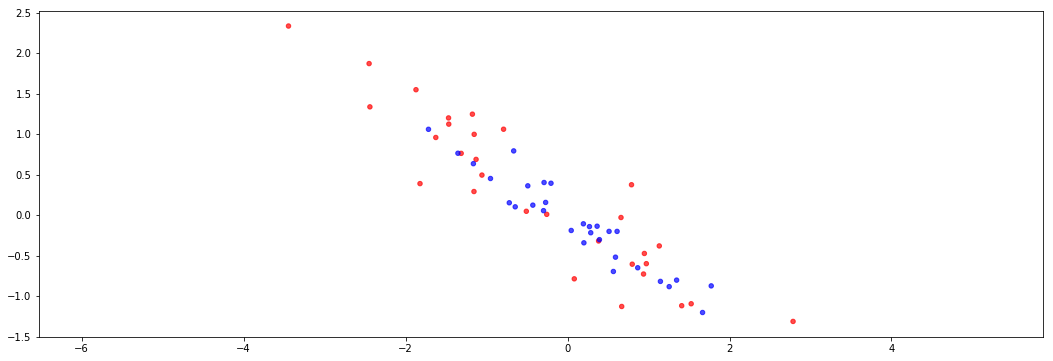

In [5]:
# Plot the first two dimensions of the empirical measures
plt.figure(figsize=(18,6))
plt.scatter(X[:,0], X[:,1], s=n*20*a, c='r', zorder=10, alpha=0.7)
plt.scatter(Y[:,0], Y[:,1], s=n*20*b, c='b', zorder=10, alpha=0.7)
plt.axis('equal')
plt.show()

In [6]:
from utils import bures_wasserstein
print('Squared Wasserstein between the (continuous) Gaussians =', bures_wasserstein(mean_1, mean_2, cov_1, cov_2))

Squared Wasserstein between the (continuous) Gaussians = 19.351364927714435


## Compute exact SRW distance using supergradient method

In [7]:
ones = np.ones((n,n))
C = np.diag(np.diag(X.dot(X.T))).dot(ones) + ones.dot(np.diag(np.diag(Y.dot(Y.T)))) - 2*X.dot(Y.T)
step_size_0 = 1./np.max(C)
print('Step size =', step_size_0)

Step size = 0.00840440579472765


In [8]:
params = {'reg':0, 'step_size_0':step_size_0, 'max_iter':100, 'threshold':0.01,
          'max_iter_sinkhorn':100, 'threshold_sinkhorn':1e-3, 'use_gpu':False}

algo = ProjectedGradientAscent(**params)

SRW_PGA = SubspaceRobustWasserstein(X, Y, a, b, algo, k=k)
SRW_PGA.run()

print('SRW =', SRW_PGA.get_value())

SRW = 12.938214900289065


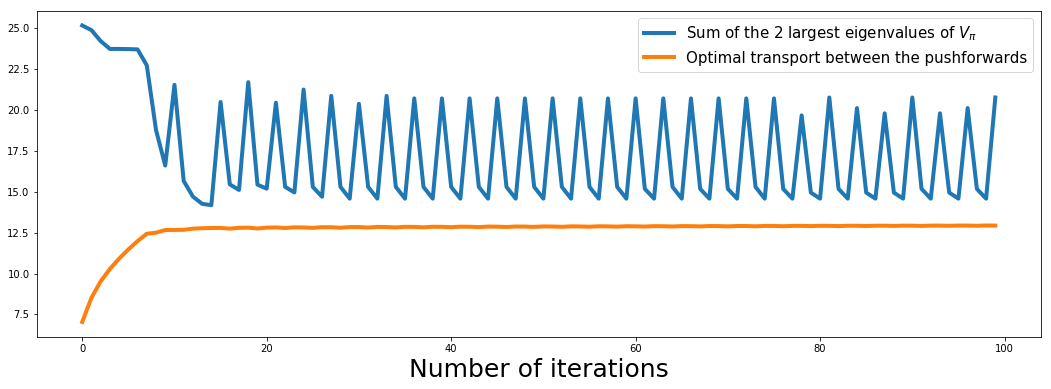

In [9]:
plt.figure(figsize=(18,6))
SRW_PGA.plot_convergence()

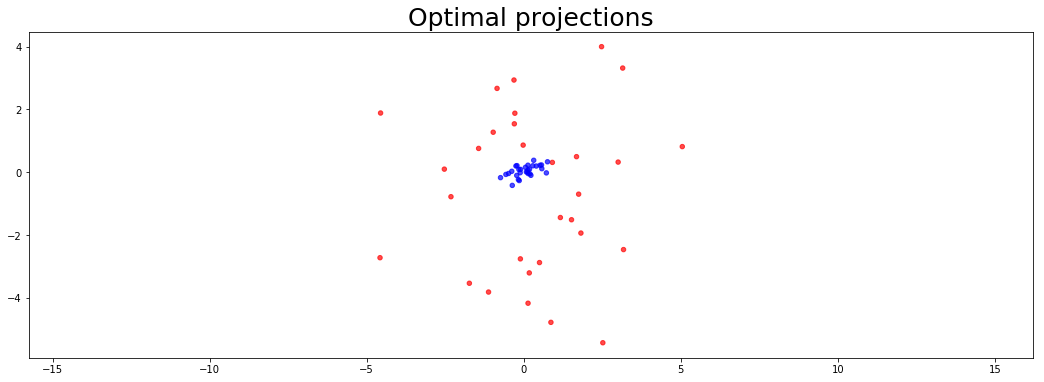

In [10]:
plt.figure(figsize=(18,6))
SRW_PGA.plot_projected_pushforwards()

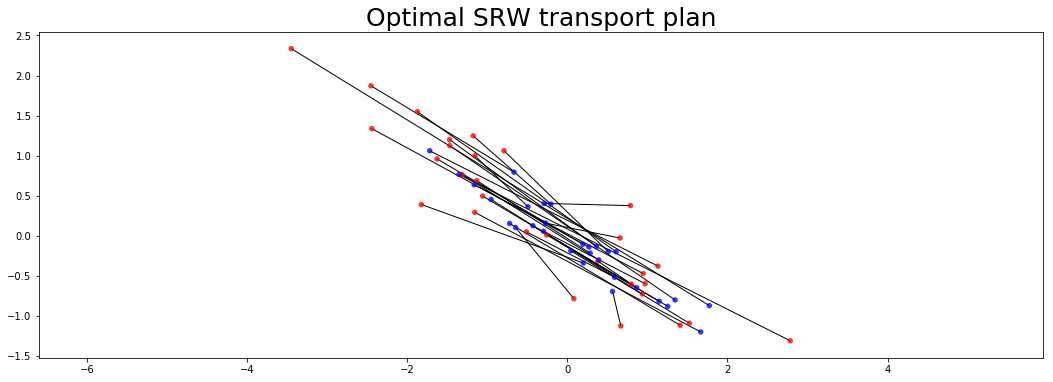

In [11]:
plt.figure(figsize=(18,6))
SRW_PGA.plot_transport_plan()

## Compute Entropic SRW distance using Frank-Wolfe algorithm

In [12]:
params = {'reg':0.15, 'step_size_0':step_size_0, 'max_iter':100, 'threshold':0.01,
          'max_iter_sinkhorn':100, 'threshold_sinkhorn':1e-3, 'use_gpu':False}

algo = FrankWolfe(**params)

SRW_FW = SubspaceRobustWasserstein(X, Y, a, b, algo, k=k)
SRW_FW.run()

print('SRW =', SRW_FW.get_value())

SRW = 13.052807778170942


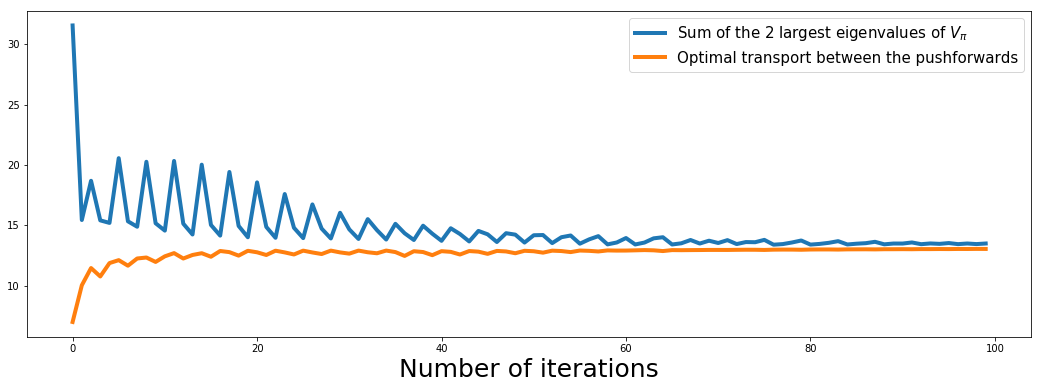

In [13]:
plt.figure(figsize=(18,6))
SRW_FW.plot_convergence()

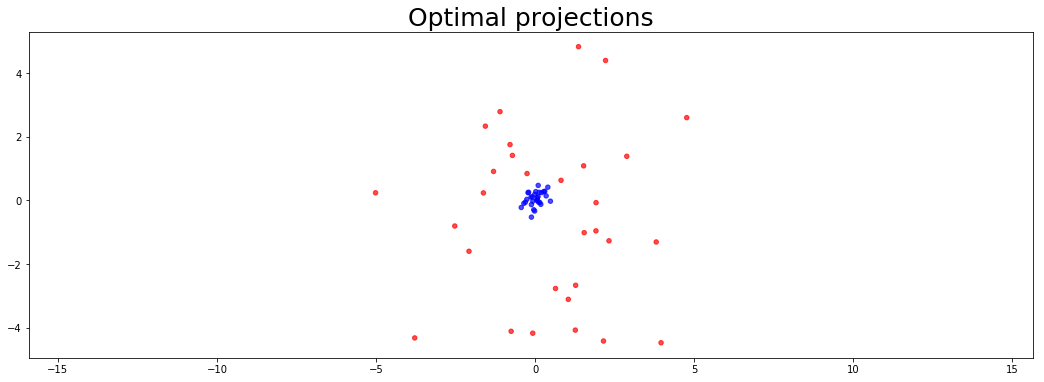

In [14]:
plt.figure(figsize=(18,6))
SRW_FW.plot_projected_pushforwards()

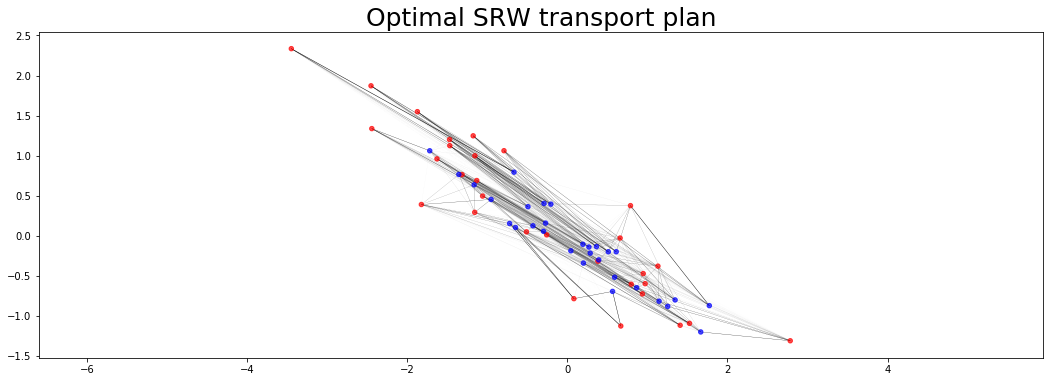

In [15]:
plt.figure(figsize=(18,6))
SRW_FW.plot_transport_plan()

## Compute Entropic SRW distances for all dimension parameter $k$

SRW values depending on `k` = {10: 17.054421709074155, 9: 17.0618650301366, 8: 17.069005544568714, 7: 17.075821836209037, 6: 17.082303550395274, 5: 17.088449291901235, 4: 17.094264500276054, 3: 16.397506115024175, 2: 13.078372473593447, 1: 6.6279473564037525}


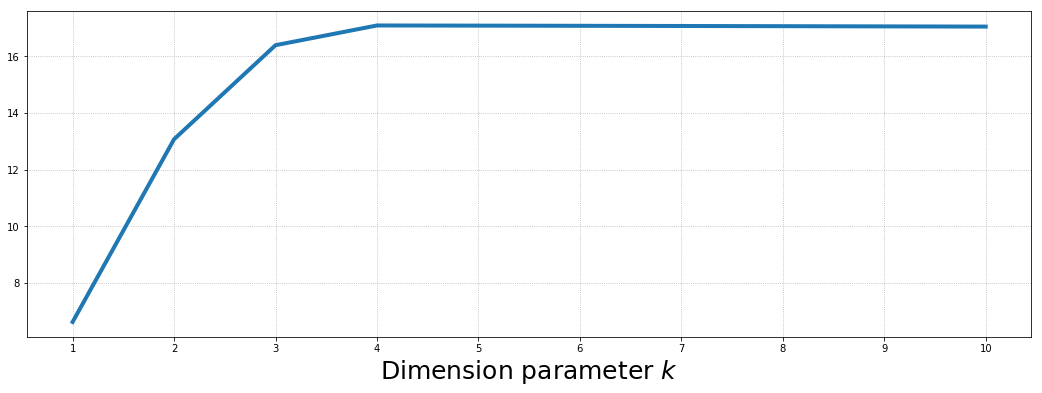

In [16]:
params = {'reg':0.15, 'step_size_0':step_size_0, 'max_iter':100, 'threshold':0.01,
          'max_iter_sinkhorn':100, 'threshold_sinkhorn':1e-3, 'use_gpu':False}

algo = FrankWolfe(**params)

SRW_FW = SubspaceRobustWasserstein(X, Y, a, b, algo, k=list(range(1,d+1)))
SRW_FW.run()

print('SRW values depending on `k` =', SRW_FW.get_value())
plt.figure(figsize=(18,6))
SRW_FW.plot_values()